<a href="https://colab.research.google.com/github/Otitoaleke/data_incubator_challenge/blob/master/TDI_Project_more_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import math
import scipy.stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/humansequences.csv",  encoding = 'unicode_escape')
data_list = df.values.tolist()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def extract(index, data_list):
    column = []    
    for row in data_list[0:]:
        #print(row)
        value = row[index]
        column.append(value)    
    return column

In [5]:
corona_list = []
for row in data_list:
    if row[4] == 'Coronaviridae':
        corona_list.append(row)

print(corona_list[:5])

[['NC_045512', '2020-01-13T00:00:00Z', 'Severe acute respiratory syndrome-related coronavirus', 'Betacoronavirus', 'Coronaviridae', 29903, 'RefSeq', 'complete', nan, nan, 'Baranov,P.V., Henderson,C.M., Anderson,C.B., Gesteland,R.F., Atkins,J.F., Howard,M.T., Robertson,M.P., Igel,H., Baertsch,R., Haussler,D., Ares,M. Jr., Scott,W.G., Williams,G.D., Chang,R.Y., Brian,D.A., Wu,F., Zhao,S., Yu,B., Chen,Y.-M., Wang,W., Hu,Y., Song,Z.-G., Tao,Z.-W., Tian,J.-H., Pei,Y.-Y., Yuan,M.L., Zhang,Y.-L., Dai,F.-H., Liu,Y., Wang,Q.-M., Zheng,J.-J., Xu,L., Holmes,E.C., Zhang,Y.-Z.', '15680415, 15630477, 10482585', 'China', 'Homo sapiens', nan, '2019-12', nan, 'Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'], ['NC_038294', '2018-08-24T00:00:00Z', 'Middle East respiratory syndrome-related coronavirus', 'Betacoronavirus', 'Coronaviridae', 30111, 'RefSeq', 'complete', nan, nan, 'Galiano,M., Myers,R., Bermingham,A., Gopal,R., Zambon,M.', nan, 'United Kingdom', 'Homo sap

In [6]:
print(len(corona_list))

5469


In [7]:
print (len(data_list))

1983799


In [8]:
cov2_list=[]
for row in corona_list:
    if 'CoV' in row[17]:
        cov2_list.append(row)
        
print(cov2_list[:5])


[['MT365028', '2020-05-05T00:00:00Z', 'Severe acute respiratory syndrome-related coronavirus', 'Betacoronavirus', 'Coronaviridae', 29891, 'GenBank', 'complete', nan, nan, 'To,K.K.W., Yuen,K.-Y.', nan, 'Hong Kong', 'Homo sapiens', nan, '2020-01-24', nan, 'Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/HKG/HKU-905a/2020, complete genome'], ['MT365029', '2020-05-05T00:00:00Z', 'Severe acute respiratory syndrome-related coronavirus', 'Betacoronavirus', 'Coronaviridae', 29891, 'GenBank', 'complete', nan, nan, 'To,K.K.W., Yuen,K.-Y.', nan, 'Hong Kong', 'Homo sapiens', nan, '2020-01-30', nan, 'Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/HKG/HKU-911a/2020, complete genome'], ['MT365030', '2020-05-05T00:00:00Z', 'Severe acute respiratory syndrome-related coronavirus', 'Betacoronavirus', 'Coronaviridae', 29891, 'GenBank', 'complete', nan, nan, 'To,K.K.W., Yuen,K.-Y.', nan, 'Hong Kong', 'Homo sapiens', nan, '2020-01-31', nan, 'Severe acute re

In [9]:
print(len(cov2_list))

2503


In [14]:
Length_CoV = extract(5, cov2_list)
CoV_intervals = np.max(Length_CoV) - np.min(Length_CoV)
print(CoV_intervals)
print(Length_CoV)

30754
[29891, 29891, 29891, 29891, 29887, 29900, 29903, 29903, 29903, 323, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29880, 29870, 29903, 29903, 29764, 29764, 29764, 29764, 29899, 29899, 29892, 29868, 29893, 29899, 29838, 29860, 29858, 29897, 29851, 29903, 29854, 29868, 29868, 29758, 29743, 29758, 29570, 29743, 29743, 29760, 29570, 29743, 29743, 29706, 29743, 29743, 29675, 29462, 29823, 29851, 29834, 29868, 29835, 29704, 29818, 29648, 29885, 29731, 29851, 29004, 29722, 29795, 29340, 29523, 29692, 29666, 29720, 29715, 29617, 29797, 29818, 29264, 29846, 29861, 29828, 29827, 29830, 29849, 29828, 29841, 29867, 29810, 29812, 29854, 29818, 29813, 29840, 29812, 29804, 29812, 29852, 29856, 29805, 29800, 29791, 29804, 29799, 29804, 29790, 29815, 29785, 29816, 29776, 29797, 29815, 29813, 29804, 29805, 29772, 29797, 29766, 29790, 29794, 29800, 29817, 29800, 29841, 29856, 29859, 29844, 29858, 29815, 29842, 29857, 29825, 29782, 29792, 29772, 29725, 29824, 29822, 29815, 29807, 2

In [16]:
np.histogram(Length_CoV,bins = [0, 1*3080 , 2*3080 , 3*3080 ,4*3080,5*3080 ,6*3080, 7*3080 ,8*3080, 9*3080 ,10*3080]) 

(array([ 455,   41,    0,    0,    0,    0,    0,    0,   19, 1987]),
 array([    0,  3080,  6160,  9240, 12320, 15400, 18480, 21560, 24640,
        27720, 30800]))

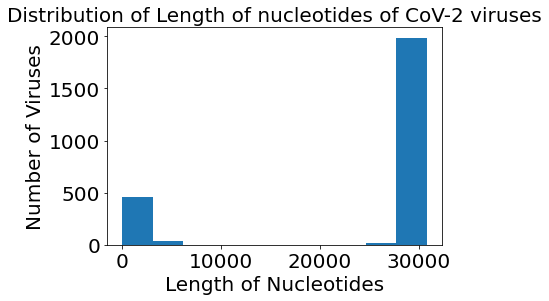

In [21]:
from matplotlib import pyplot as plt 
plt.hist(Length_CoV,bins = [0, 1*3080 , 2*3080 , 3*3080 ,4*3080,5*3080 ,6*3080, 7*3080 ,8*3080, 9*3080 ,10*3080])
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)  
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.title("Distribution of Length of nucleotides of CoV-2 viruses", fontsize=20)
plt.xlabel('Length of Nucleotides', fontsize=20)
plt.ylabel('Number of Viruses', fontsize=20) 
#plt.yscale('log')
plt.show()